https://detexify.kirelabs.org/classify.html

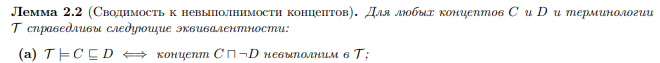

Если
$
\begin{cases}
C \sqsubseteq D \\
C \sqcap \neg D
\end{cases}
$
,то $ C \sqcap \neg D \equiv \emptyset $

Это значит, что интерпретация $\iota$ будет эквивалентна $\emptyset$ 

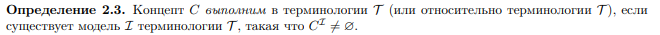

По определению 2.3 концепт $C \sqcap \neg D$ невыполним в $\mathcal{T} \blacksquare$ 

Задание. По своей выбранной теме построить базу знаний: терминологию и систему фактов. Также построить три верных и три неверных запроса.

TBox:

$ЛА \equiv Вертолет \sqcup Самолет \\
ЛА \sqsubseteq \forall ИмеетГрузовойОтсек.ЛА \\
Грузовой \equiv ЛА \sqcap \exists ИмеетГрузовойОтсек. \top$

ABox:

$
Ан-225:Грузовой \\
Ан-225: \neg Вертолет \\
Robinson R44: ЛА \sqcap \neg Самолет
$

Верные:

$
Ан-255: Самолет \sqcap Грузовой\\
Robinson R44: Вертолет \sqcap \neg Грузовой\\
Ан-255 : ЛА
$

Неверные:

$
RobinsonR44 \sqcup Ан-255 \equiv ЛА\\
Ан-255 \equiv Самолет \sqcap ИмеетГрузовойОтсек.\top\\
RobinsonR44 \sqsubseteq ЛА \sqcap ИмеетГрузовойОтсек.\top
$

Программная часть

In [18]:
!pip install owlready2
!git clone https://github.com/dityas/Athene.git
!pip install git+https://github.com/rdflib/rdflib

fatal: destination path 'Athene' already exists and is not an empty directory.
  Cloning https://github.com/rdflib/rdflib to /tmp/pip-req-build-3pfpxr_v
  Running command git clone -q https://github.com/rdflib/rdflib /tmp/pip-req-build-3pfpxr_v


In [2]:
from Athene.reasoner.knowledgebase.axioms import *
from Athene.reasoner.common.constructors import *
from Athene.reasoner.reasoning.tableau import *
from Athene.reasoner.knowledgebase.knowledgebase import KnowledgeBase

In [4]:
classes = ['ЛА', 'Вертолет', 'Самолет', 'Грузовой']
individuals = ['Ан-255', 'Robinson R44']
roles = ['Имеет грузовой отсек']

In [5]:
axioms = [TBoxAxiom(Subsumption(Or(Concept(classes[1]), Concept(classes[2])), Concept(classes[0]))),
TBoxAxiom(Subsumption(Some(roles[0], Concept(classes[0])), Concept(classes[0]))),
TBoxAxiom(Subsumption(Some(roles[0], Concept(classes[0])), Concept(classes[3]))),
ABoxAxiom(ClassAssertion(Concept(classes[3]),Concept(individuals[0]))),
ABoxAxiom(ClassAssertion(Not(Concept(classes[1])) ,Concept(individuals[0]))),
ABoxAxiom(ClassAssertion(And(Concept(classes[0]), Not(Concept(classes[2]))),Concept(individuals[1])))]

In [19]:
base = KnowledgeBase()
base.load_from_list(axioms)

In [20]:
base.abox

{ASSERT Robinson R44 IS A (ЛА AND NOT Самолет),
 ASSERT Ан-255 IS A NOT Вертолет,
 ASSERT Ан-255 IS A Грузовой}

In [21]:
base.tbox

{ALL (Вертолет OR Самолет) ARE ЛА,
 ALL SOME.Имеет грузовой отсек.ЛА ARE Грузовой,
 ALL SOME.Имеет грузовой отсек.ЛА ARE ЛА}

In [23]:
base.run_sat()
base.print_kb()

[ ASSERT Ан-255 IS A Грузовой,
  ASSERT Robinson R44 IS A (ЛА AND NOT Самолет),
  ASSERT Ан-255 IS A NOT Вертолет,
  ALL (Вертолет OR Самолет) ARE ЛА,
  ALL SOME.Имеет грузовой отсек.ЛА ARE ЛА,
  ALL SOME.Имеет грузовой отсек.ЛА ARE Грузовой]


In [37]:
r1 = ABoxAxiom(ClassAssertion(And(Concept('Самолет'), Concept('Грузовой')), Concept('Ан-255')))
r2 = ABoxAxiom(ClassAssertion(And(Concept('Вертолет'), Not(Concept('Грузовой'))), Concept('Robinson R44')))
r3 = ABoxAxiom(ClassAssertion(Concept('ЛА'), Concept('Ан-255')))
r4 = ABoxAxiom(ClassAssertion(Concept('Robinson R44'), Concept('Ан-255')))
r5 = ABoxAxiom(ClassAssertion(Concept('Вертолет'), Concept('Ан-255')))
r6 = ABoxAxiom(ClassAssertion(Concept('Самолет'), Concept('Robinson R44')))

In [38]:
base.is_satisfiable(r1)

True

In [39]:
base.is_satisfiable(r2)

True

In [40]:
base.is_satisfiable(r3)

True

In [41]:
base.is_satisfiable(r4)

True

In [42]:
base.is_satisfiable(r5)

True

In [43]:
base.is_satisfiable(r6)

True

In [57]:
base.is_consistent()

True

In [63]:
base.model.models

[{'Robinson R44': ({'ALL': set(), 'AND': set(), 'OR': set(), 'SOME': set()},
   {NOT Вертолет, NOT Грузовой, NOT Самолет, Вертолет, ЛА, Самолет},
   False,
   {'Имеет грузовой отсек': None}),
  'Ан-255': ({'ALL': set(), 'AND': set(), 'OR': set(), 'SOME': set()},
   {NOT Вертолет,
    NOT ЛА,
    NOT Самолет,
    Robinson R44,
    Вертолет,
    Грузовой,
    ЛА,
    Самолет},
   False,
   {'Имеет грузовой отсек': None})},
 {'Robinson R44': ({'ALL': set(), 'AND': set(), 'OR': set(), 'SOME': set()},
   {NOT Вертолет, NOT Грузовой, NOT Самолет, Вертолет, Грузовой, ЛА, Самолет},
   False,
   {'Имеет грузовой отсек': None}),
  'Ан-255': ({'ALL': set(), 'AND': set(), 'OR': set(), 'SOME': set()},
   {NOT Вертолет,
    NOT ЛА,
    NOT Самолет,
    Robinson R44,
    Вертолет,
    Грузовой,
    ЛА,
    Самолет},
   False,
   {'Имеет грузовой отсек': None})},
 {'Robinson R44': ({'ALL': set(), 'AND': set(), 'OR': set(), 'SOME': set()},
   {NOT Вертолет, NOT Грузовой, NOT Самолет, Вертолет, ЛА, Само